In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
file_names = ["leg_data_test_front_mat", "leg_data_test_neg_45_degree", "leg_data_test_pos_45_degree", "leg_data_test_neg_90_degree", "leg_data_test_pos_90_degree", "leg_data_test_0_degree", "leg_data_test_back_mat"]
data_frames = {}

for name in file_names:
  substring_name = name[14:]
  data_frames[substring_name] = pd.read_csv(f'/content/gdrive/MyDrive/Pressure Sensor Maching Learning/Previous Data/{name}.csv')


In [ ]:
data_frames

{'front_mat':          f1   f2   f3   f4   f5   f6
 0       915  871  806  767  717   97
 1       910  868  806  751  720  103
 2       898  875  803  757  722   99
 3       910  859  792  764  717   99
 4       895  870  808  750  717   98
 ...     ...  ...  ...  ...  ...  ...
 228489  913  870  803  795  735  114
 228490  908  872  811  810  738  109
 228491  913  875  809  787  740  112
 228492  895  879  814  802  738  114
 228493  909  875  809  790  726  110
 
 [228494 rows x 6 columns],
 'neg_45_degree':          b1   b2   b3   b4   b5   b6
 0       412  855  882  831  876  369
 1       411  852  885  825  882  363
 2       406  852  885  827  879  363
 3       408  847  893  825  878  364
 4       420  856  891  826  876  363
 ...     ...  ...  ...  ...  ...  ...
 228440  452  857  894  833  884  352
 228441  457  847  893  835  884  335
 228442  455  861  888  831  875  336
 228443  462  864  893  833  878  340
 228444  452  855  881  837  874  342
 
 [228445 rows x 6 columns]

In [ ]:
# Rename all column names
for key, df in data_frames.items():
    df.columns = ["f1", "f2", "f3", "f4", "f5", "f6"]
# Add 'label' column to each DataFrame for good fit and bad fit
data_frames['0_degree']['Fit'] = 'good'

i = 0;
for key, df in data_frames.items():
  if key != '0_degree':
      df["Fit"] = 'bad'
  df["Experiment"] = key #Add label for dataset taken from
  i += 1

data_frames

{'front_mat':          f1   f2   f3   f4   f5   f6  Fit Experiment
 0       915  871  806  767  717   97  bad  front_mat
 1       910  868  806  751  720  103  bad  front_mat
 2       898  875  803  757  722   99  bad  front_mat
 3       910  859  792  764  717   99  bad  front_mat
 4       895  870  808  750  717   98  bad  front_mat
 ...     ...  ...  ...  ...  ...  ...  ...        ...
 228489  913  870  803  795  735  114  bad  front_mat
 228490  908  872  811  810  738  109  bad  front_mat
 228491  913  875  809  787  740  112  bad  front_mat
 228492  895  879  814  802  738  114  bad  front_mat
 228493  909  875  809  790  726  110  bad  front_mat
 
 [228494 rows x 8 columns],
 'neg_45_degree':          f1   f2   f3   f4   f5   f6  Fit     Experiment
 0       412  855  882  831  876  369  bad  neg_45_degree
 1       411  852  885  825  882  363  bad  neg_45_degree
 2       406  852  885  827  879  363  bad  neg_45_degree
 3       408  847  893  825  878  364  bad  neg_45_degree
 4

In [ ]:
# Concatenate all DataFrames into a new DataFrame
all_data = pd.concat(list(data_frames.values()), ignore_index=True)
print(len(all_data))


1599285


Extracting FSR 2 and FSR 3 for data comparison


In [ ]:
sample_size = 1000  # Adjust this based on your needs

data = []
for experiment, df in data_frames.items():
  selected_columns = df.iloc[:, [1, 2, 7]].copy()
  sampled = selected_columns.sample(sample_size)
  data.append(sampled)
# Combine samples into a single dataframe
combined_df = pd.concat(data).reset_index(drop=True)
combined_df

,f2,f3,Experiment
0,870,808,front_mat
1,862,807,front_mat
2,873,810,front_mat
3,879,804,front_mat
4,867,805,front_mat
...,...,...,...
6995,872,877,back_mat
6996,882,877,back_mat
6997,879,872,back_mat
6998,879,877,back_mat


In [ ]:
max_val = max(combined_df["f2"])
min_val = min(combined_df["f2"])
print(max_val)
print(min_val)
num_cats = 4
cat_nums = np.linspace(min_val, max_val, num_cats)
print(cat_nums)

924
836
[836.         865.33333333 894.66666667 924.        ]


In [ ]:
combined_df["f2_cat"] = np.digitize(combined_df["f2"], cat_nums)
# Define a dictionary to map category numbers to labels
category_mapping = {
    1: "low",
    2: "medium",
    3: "high",
}

# Map category numbers to labels
combined_df["f2_cat_label"] = combined_df["f2_cat"].map(category_mapping)
combined_df

,f2,f3,Experiment,f2_cat,f2_cat_label
0,877,801,front_mat,2,medium
1,880,810,front_mat,2,medium
2,860,810,front_mat,1,low
3,876,803,front_mat,2,medium
4,880,806,front_mat,2,medium
...,...,...,...,...,...
6995,862,871,back_mat,1,low
6996,874,874,back_mat,2,medium
6997,886,872,back_mat,2,medium
6998,877,877,back_mat,2,medium


In [ ]:
print(np.digitize([841, 900, 907, 908, 920], cat_nums))

[1 3 3 3 3]


In [ ]:
combined_df.to_csv("/content/gdrive/MyDrive/Pressure Sensor Maching Learning/sample_project_data.csv")

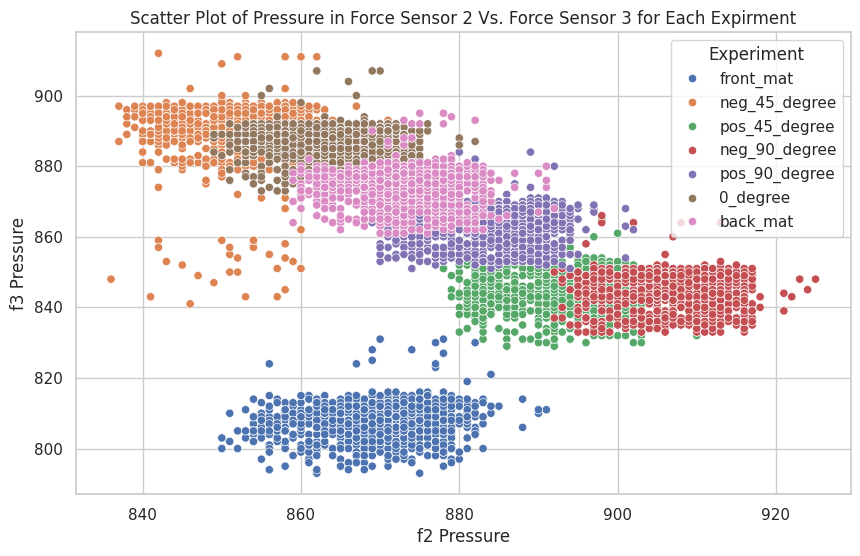

In [ ]:
import seaborn as sns
# Use seaborn for improved aesthetics (optional)
sns.set(style="whitegrid")

# Plot the scatter plot with labeled experiments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f2', y='f3', hue='Experiment', data=combined_df)

# Add labels and title
plt.xlabel('f2 Pressure')
plt.ylabel('f3 Pressure')
plt.title('Scatter Plot of Pressure in Force Sensor 2 Vs. Force Sensor 3 for Each Expirment')

# Display the plot
plt.show()

In [ ]:
import setuptools
!pip install --verbose commons

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Using cached commons-0.7.tar.gz (49 kB)
  Running command python setup.py egg_info
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "/tmp/pip-install-3e3uo751/commons_e28419ae89c14ce992ef91071484f22d/setup.py", line 41, in <module>
      setup.run_setup( pkg_info_text,
    File "/tmp/pip-install-3e3uo751/commons_e28419ae89c14ce992ef91071484f22d/src/commons/setup.py", line 81, in run_setup
      for key, value in pkg_info.iteritems():
  AttributeError: 'dict' object has no attribute 'iteritems'
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  full command: /usr/bin/python3 -c '
  exec(compile('"'"''"'"''"'"'
  # This is <pip-setupto